In [1]:
from ndslib.config import jupyter_startup
jupyter_startup()

(core-ml)=
# The core concepts of machine learning

We've arrived at the last chapter of the book. Hopefully you've enjoyed the
journey to this point! In this chapter, we'll dive into machine learning. There's a lot to
cover, so this will be a pretty long chapter. To keep things manageable, we've
structured the material into 7 sections. Here in {numref}`core-ml`, we'll review
some core concepts in machine learning, setting the stage for everything that
follows. In {numref}`scikit-learn`, we'll introduce the *Scikit-learn* Python
package, which we'll rely on heavily throughout the chapter.
{numref}`ml-overfitting` explores the central problem of *overfitting*;
{numref}`ml-validation` and {numref}`ml-selection` then cover different ways of
diagnosing and addressing overfitting via model validation and model selection,
respectively. Finally, in {numref}`dl`, we close with a brief
review of deep learning methods -— a branch of machine learning that has made
many recent advances, and one that's recently made considerable inroads into
neuroimaging.

Before we get into it, a quick word about our guiding philosophy. Many texts
covering machine learning adopt what we might call a "catalog" approach: they
try to cover as many of the different classes of machine learning algorithms as
possible. This won't be our approach here. For one thing, there's simply no way
to do justice to even a small fraction of this space within the confines of one
chapter (even a long one). More importantly, though, we think it's far more
important to develop a basic grasp on core concepts and tools in machine
learning than to have a cursory familiarity with many of the different
algorithms out there. In our anecdotal experience, neuroimaging researchers new
to machine learning are often bewildered by the sheer number of algorithms
implemented in machine learning packages like Scikit-learn, and sometimes fall
into the trap of systematically applying every available algorithm to their
problem, in the hopes of identifying the "best" one. For reasons we'll discuss
in depth in this chapter, this kind of approach can be quite dangerous; not only
does it preempt a deeper understanding of what one is doing, but, as we'll see
in {numref}`ml-overfitting` and {numref}`ml-validation`, it can make one's
results considerably *worse* by increasing the risk of overfitting.

## What *is* machine learning?

This is a chapter on machine learning, so now is probably a good time to give a
working definition. Here's a reasonable one: **machine learning is the field of
science/engineering that seeks to build systems capable of learning from
experience.**

This is a very broad definition, and in practice, the set of activities that get
labeled "machine learning" is quite broad and varied. But two elements are
common to most machine learning applications: (1) an emphasis is on developing
algorithms that can learn (semi-)autonomously from data, rather than static
rule-based systems that must be explicitly designed or updated by humans; and
(2) an approach to performance evaluation that focuses heavily on well-defined
quantitative targets.

We can contrast machine learning with traditional scientific inference, where
the goal (or at least, *a* goal) is to *understand* or *explain* how a system
operates.

The goals of prediction and explanation are not mutually exclusive, of course.
But most people tend to favor one over the other to some extent. And, as a rough
generalization, people who do machine learning tend to be more interested in
figuring out how to make useful predictions than in arriving at a "true", or
even just an approximately correct, model of the data-generating process
underlying a given phenomenon. By contrast, people interested in explanation
might be willing to accept models that don't make the strongest possible
predictions (or often, even good ones) so long as those models provide some
insight into the mechanisms that seem to underlie the data.

We don't need to take a principled position on the prediction vs. explanation
divide here (plenty has been written on the topic; see
{numref}`ml-core-addtl-resources` below). Just be aware that, for purposes of
this chapter, we're going to assume that our goal is mainly to generate good
predictions, and that understanding and interpretability are secondary or
tertiary on our list of desiderata (though we'll still say something about them
now and then).

## Supervised vs. unsupervised learning

Broadly speaking, machine learning can be carved up into two forms of learning:
**supervised** and **unsupervised**. We say that learning is supervised whenever
we know the true values that our model is trying to predict, and hence, are in a
position to "supervise" the learning process by quantifying prediction accuracy
and the associated prediction error. "Ordinary" least-squares regression, in the
machine learning context, is an example of supervised learning: our model takes
as its input both a vector of *features* (conventionally labeled `X`) and a
vector of *labels* (`y`). Researchers often use different terminology in various
biomedical disciplines—often calling `X` *variables* or *predictors*, and `y`
the *outcome* or *dependent variable*—but the idea is the same.

```{eval-rst}
.. index::
   single: Supervised learning
```

```{eval-rst}
.. index::
   single: Unsupervised learning
```

Here are some examples of supervised learning problems (the first of which we'll attempt later):

* Predicting people's chronological age from structural brain differences
* Determining whether or not an incoming email is spam
* Predicting a person's rating of a particular movie based on their ratings of other movies
* Discriminating schizophrenics from controls based on genetic markers

In each of these cases, we expect to train our model using a dataset where we
know the ground truth—i.e., we have *labeled* examples of age, spam, movie
ratings, and a schizophrenia diagnosis, in addition to any number of potential
features we might use to try and predict each of these labels.

## Supervised learning: classification vs. regression

Within the class of supervised learning problems, we can draw a further
distinction between **classification** problems and **regression** problems. In
both cases, the goal is to develop a predictive model that recovers the true
labels as accurately as possible. The difference between the two lies in the
nature of the labels: in classification, the labels reflect discrete classes; in
regression, the labeled values vary continuously.

### Regression

A regression problem arises any time we have a set of continuous numerical
labels and we're interested in using one or more features to try and predict
those labels. Any bivariate relationship can be conceptualized as a regression
of one variable on the other. For example, suppose we have the data displayed in
this scatterplot:

```{eval-rst}
.. index::
   single: Regression
```

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Fix the random seed here
np.random.seed(100)

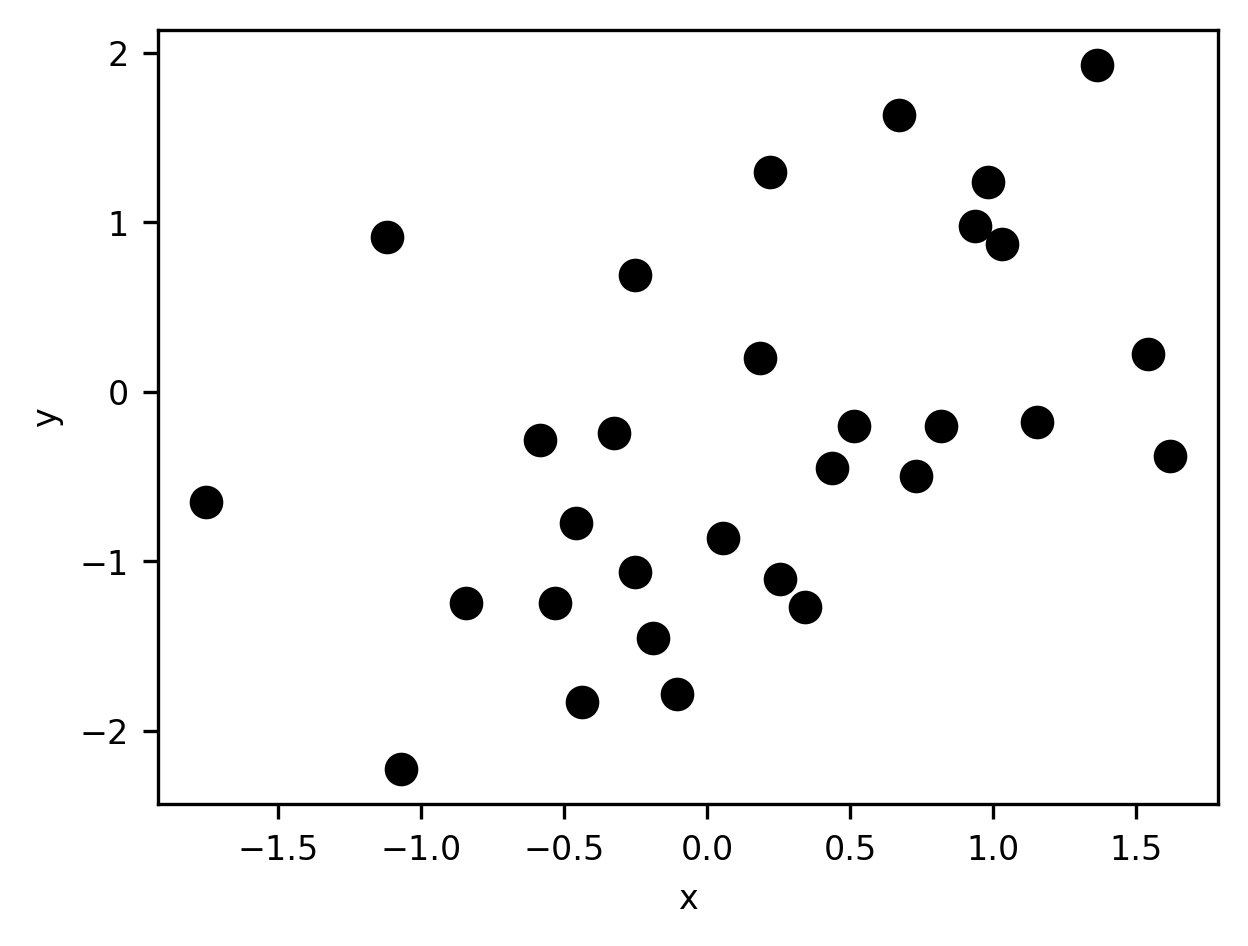

In [4]:
x = np.random.normal(size=30)
y = x * 0.5 + np.random.normal(size=30)

fig, ax = plt.subplots()
ax.scatter(x, y, s=50)
ax.set_xlabel('x')
label = ax.set_ylabel('y')

We can frame this as a regression problem by saying that our goal is to generate
the best possible prediction for `y` given knowledge of `x`. There are many ways
to define what constitutes the "best" prediction, but here we'll use the
*least-squares* criterion and say we want a model that, when given the `x`
scores as inputs, will produce predictions for `y` that minimize the sum of
squared deviations between the predicted scores and the true scores.

This is what "ordinary" least-squares (OLS) regression gives us. Here's the OLS
solution: first we add a column to `x`. This column will be used to model the
intercept of the line that relates `y` to `x`.

In [5]:
x_with_int = np.hstack((np.ones((len(x), 1)), x[:, None]))

```{eval-rst}
.. index::
   single: Ordinary least-squares regression
```

Then, we solve the set of linear equations using Scipy's linear algebra
routines. This gives us parameter estimates for the intercept and the slope.

In [6]:
w = np.linalg.lstsq(x_with_int, y, rcond=None)[0]
print("Parameter estimates (intercept and slope):", w)

Parameter estimates (intercept and slope): [-0.36822492  0.62140416]


Then, we visualize the data and also a straight line that represents the model
of the data based on the regression:

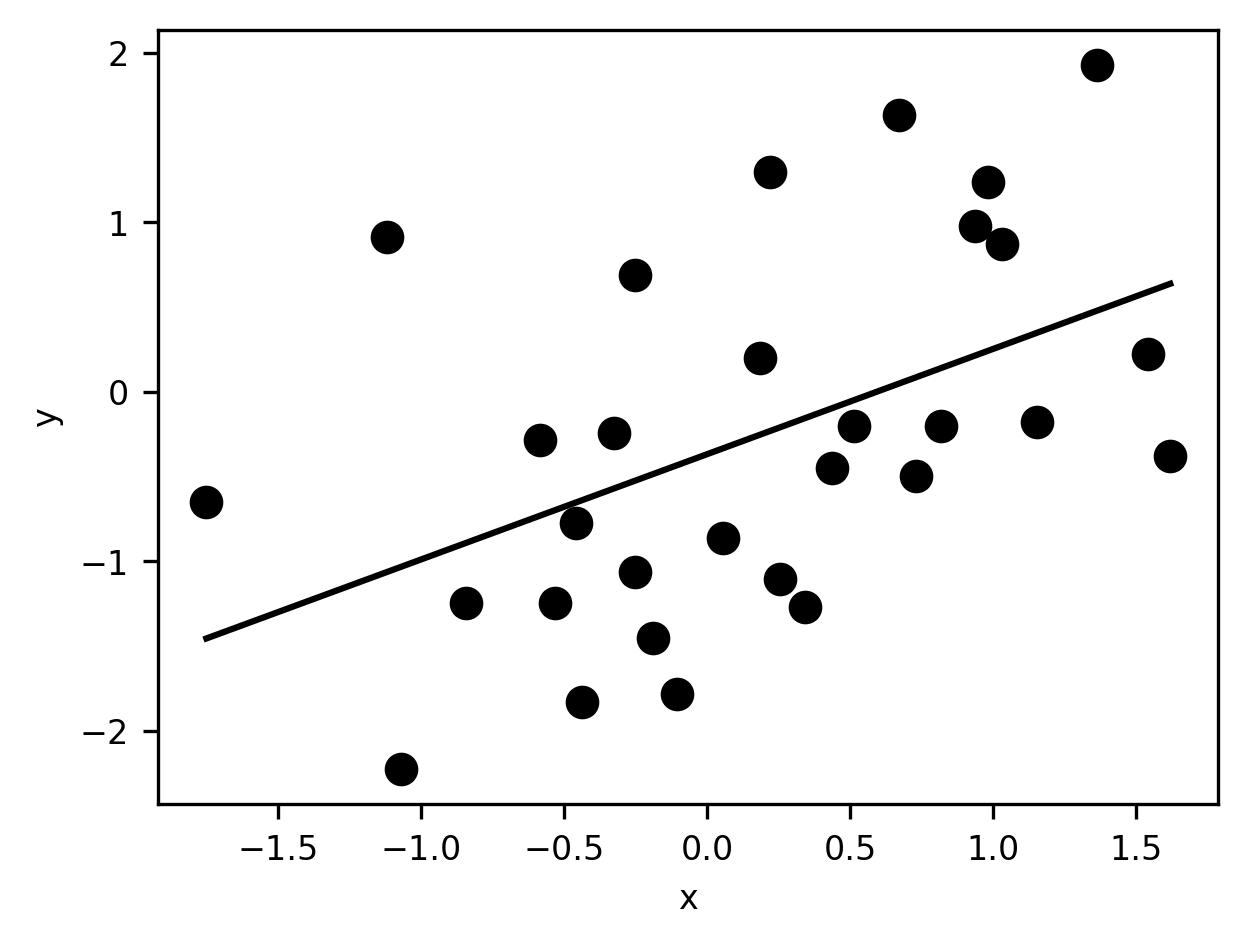

In [7]:
fig, ax = plt.subplots()
ax.scatter(x, y, s=50)
ax.set_xlabel('x')
ax.set_ylabel('y')

xx = np.linspace(x.min(), x.max()).T
line = w[0] + w[1] * xx

p = plt.plot(xx, line)

What is this model? Based on the values of the parameters, we can say that the
linear prediction equation that produced the predicted scores above can be
written as $\hat{y} =  -0.37 + 0.62x$.

Of course, not every model we use to generate a prediction will be quite this
simple. Most won't—either because they have more parameters, or because the
prediction can't be expressed as a simple weighted sum of the parameter values.
But what all regression problems share in common with this very simple example
is the use of one or more features to try and predict labels that vary
continuously.

(class)=
### Classification

Classification problems are conceptually similar to regression problems. In
classification, just like in regression, we're still trying to learn to make the
best predictions we can for some target set of labels. The difference is that
the labels are now discrete rather than continuous. In the simplest case, the
labels are binary: there are only two *classes*. For example, we can use
utilities from the Scikit Learn library (we'll learn more about this library in
{numref}`scikit-learn`) to create data that look like this

```{eval-rst}
.. index::
   single: Classification
```

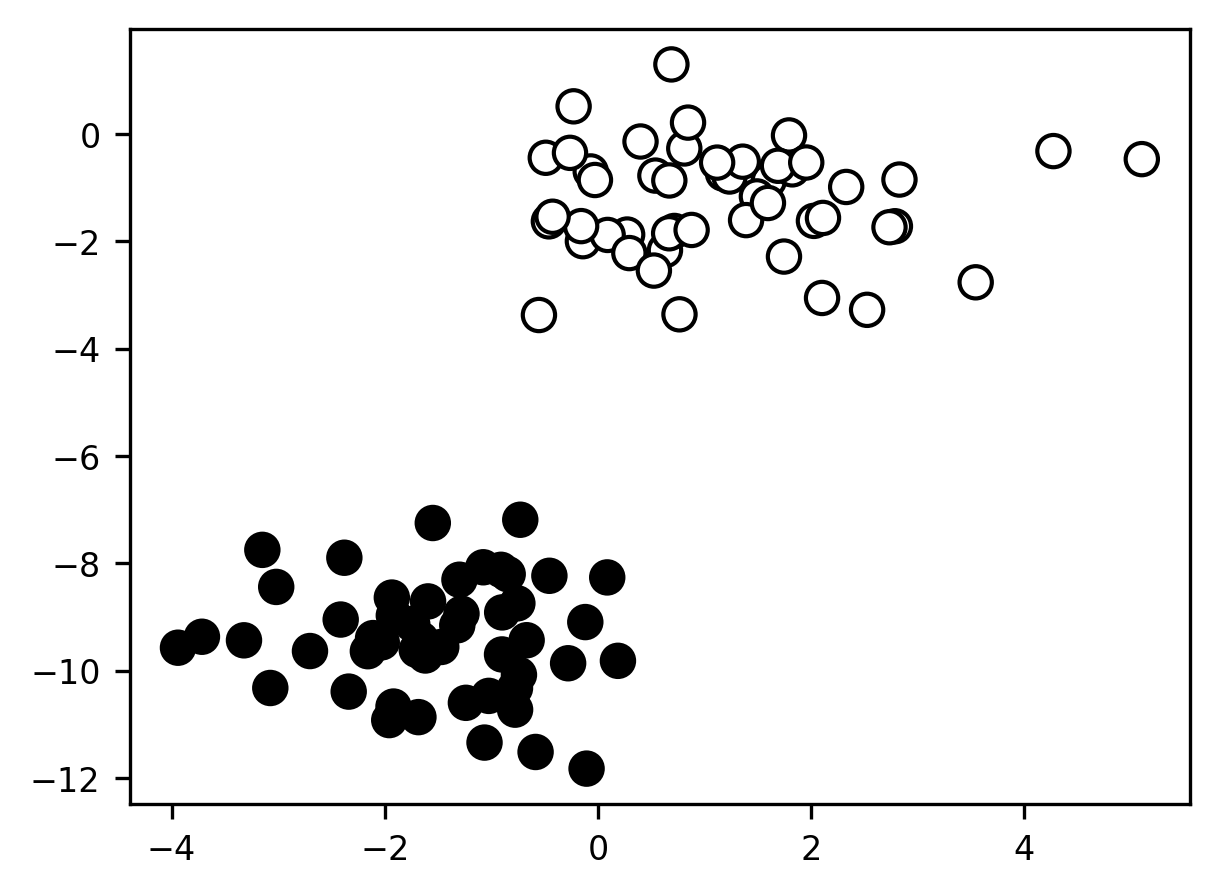

In [8]:
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=2, random_state=2)
fig, ax = plt.subplots()
s = ax.scatter(*X.T, c=y, s=60, edgecolor='k', linewidth=1)

Here, we have two features (on the x- and y-axes) we can use to try to correctly
*classify* each sample. The two classes are labeled by color.

In the above example, the classification problem is quite trivial: it's clear to
the eye that the two classes are perfectly *linearly separable* so that we can
correctly classify 100% of the samples just by drawing a line between them. Of
course, most real-world problems won't be nearly this simple. As we'll see
later, when we work with real data, the feature-space distributions of our
labeled cases will usually overlap considerably, so that no single feature (and
often, not even all of our features collectively) will be sufficient to
perfectly discriminate cases in each class from cases in other classes.

## Unsupervised learning: clustering and dimensionality reduction

In unsupervised learning, we don't know the ground truth. We have a dataset
containing some observations that vary on some set of features `X`, but we're
not given any set of accompanying labels `y` that we're supposed to try to
recover using `X`. Instead, the goal of unsupervised learning is to find
interesting or useful structure in the data. What counts as interesting or
useful is of course very much person and context-dependent. But the key point is
that there is no strictly right or wrong way to organize our samples (or if
there is, we don't have access to that knowledge). So we're forced to muddle
along the best we can, using only the variation in the `X` features to try and
make sense of our data in ways that we think might be helpful to us later.

Broadly speaking, we can categorize unsupervised learning applications into two
classes: clustering and dimensionality reduction.

### Clustering

In clustering, our goal is to label the samples we have into discrete *clusters*
(or groups). In a sense, clustering is just *classification without ground
truth*. In classification, we're trying to recover the class assignments that we
know to be there; in clustering, we're trying to make class assignments even
though we have no idea what the classes truly are, or even if they exist at all.

```{eval-rst}
.. index::
   single: Clustering
```

The best-case scenario for a clustering application might look something like this:

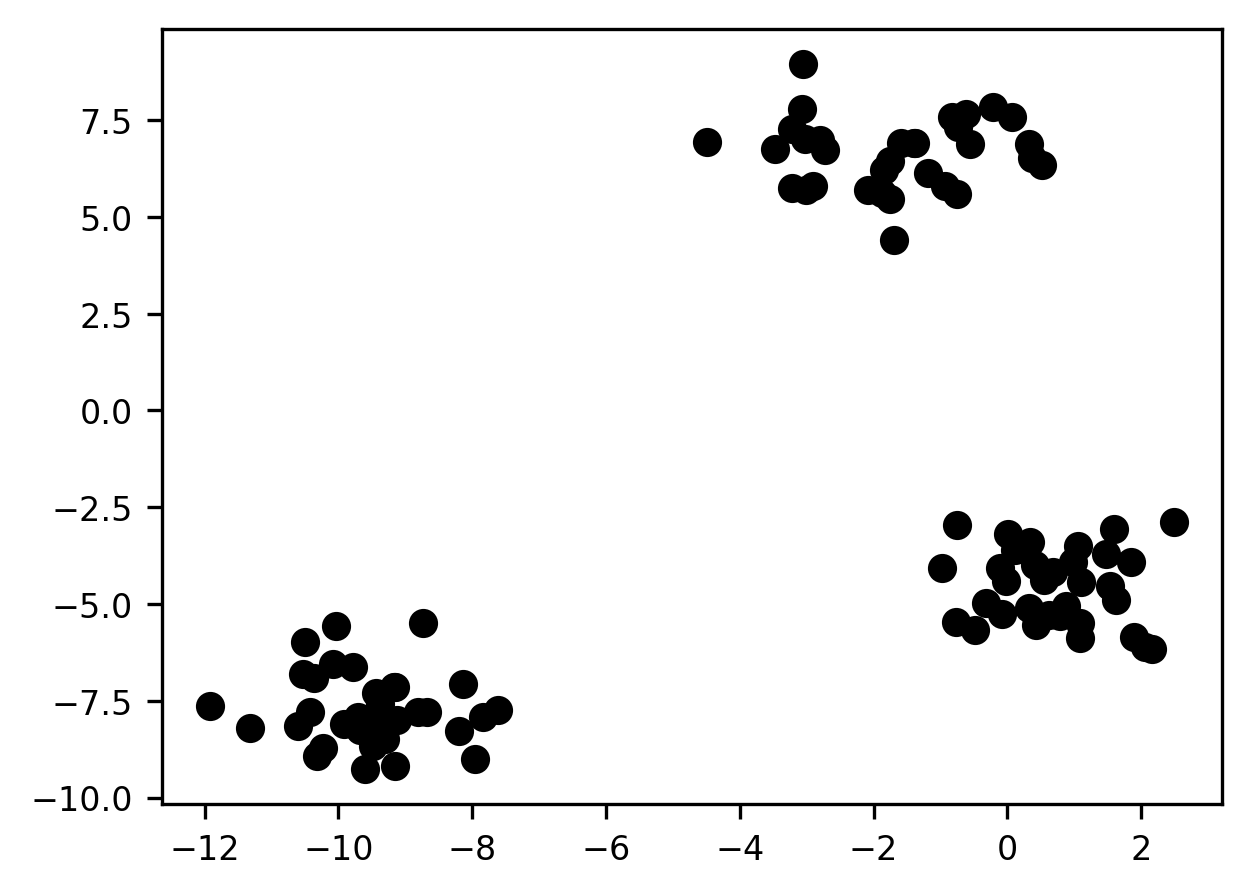

In [9]:
X, y = make_blobs(random_state=100)
fig, ax = plt.subplots()
s = ax.scatter(*X.T)

Remember: we don't know the true labels for these observations (that's why
they're all assigned the same color in the above plot). So in a sense, any
cluster assignment we come up with is just our best guess as to what might be
going on. Nevertheless, in this particular case, the spatial grouping of the
samples in 2 dimensions is so striking that it's hard to imagine us having any
confidence in any assignment except the following one:

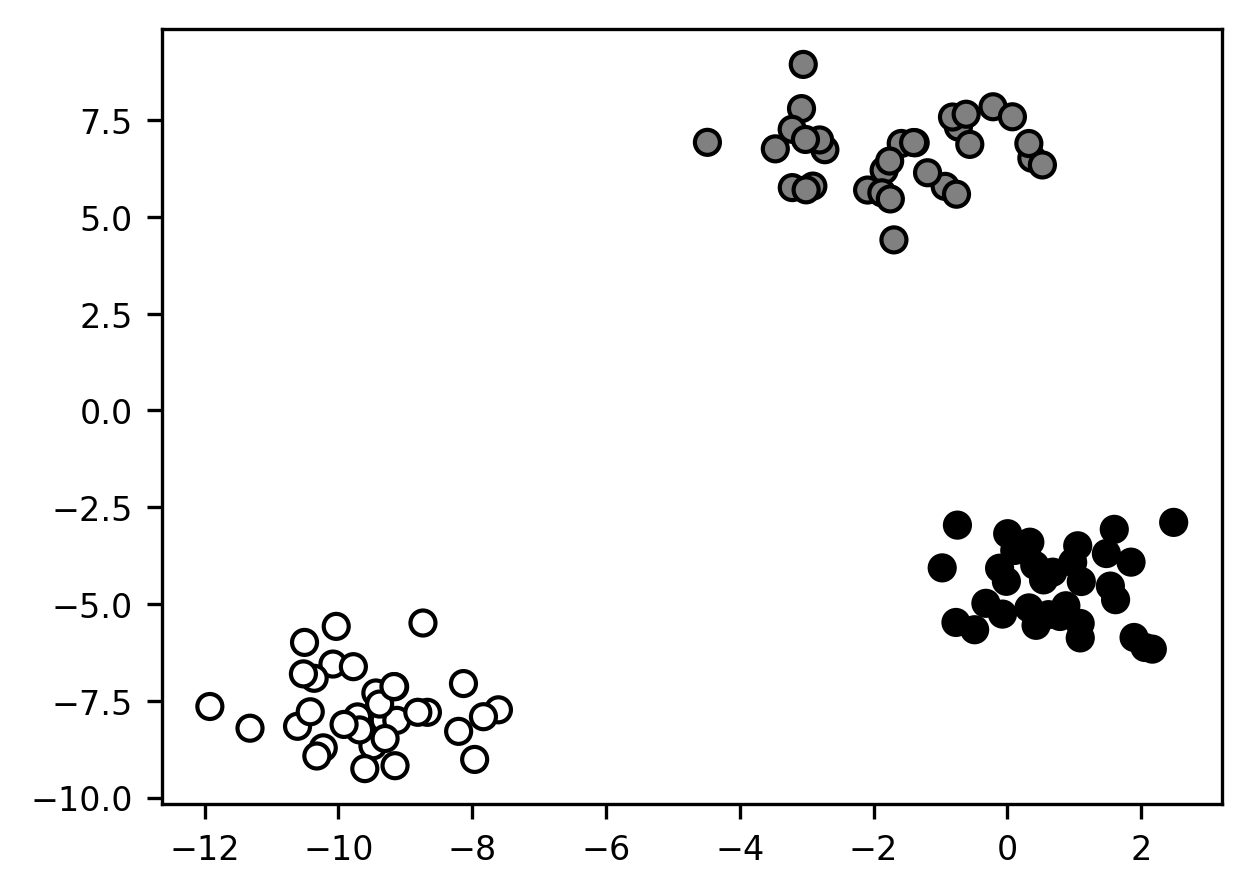

In [10]:
X, y = make_blobs(random_state=100)
fig, ax = plt.subplots()
s = ax.scatter(*X.T, c=y)

Of course, just as with the toy classification problem we saw earlier,
clustering problems this neat rarely show up in nature. Worse, in the real
world, there often *aren't* any "true" clusters. Often, the underlying
data-generating process is best understood as a complex (i.e., high-dimensional)
continuous function. In such cases, clustering can still be very helpful, as it
can help reduce complexity and give us insight into regularities in the data.
But when we use clustering methods (and, more generally, any kind of
unsupervised learning approach), we should try to always remember the adage that
*the map is not the territory*—meaning, we shouldn't mistake a description of a
phenomenon for the phenomenon itself.

### Dimensionality reduction

The other major class of unsupervised learning application is **dimensionality reduction**. Here, the idea, just as the name suggests, is to reduce the dimensionality of our data. The reasons why dimensionality reduction is important in machine learning will become clearer when we talk about overfitting later, but a general intuition we can build on is that most real-world datasets—especially large ones—can be efficiently described using fewer dimensions than there are nominal features in the dataset. Real-world datasets tend to contain a good deal of structure: variables are related to one another in important (though often non-trivial) ways, and some variables are *redundant* with others, in the sense that they can be redescribed as functions of other variables. The idea is that, if we can capture most of the variation in the features of a dataset using a smaller subset of those features, we can reduce the effective size of our dataset and build predictions more efficiently.

```{eval-rst}
.. index::
   single: Dimensionality reduction
```

To illustrate, consider this dataset:

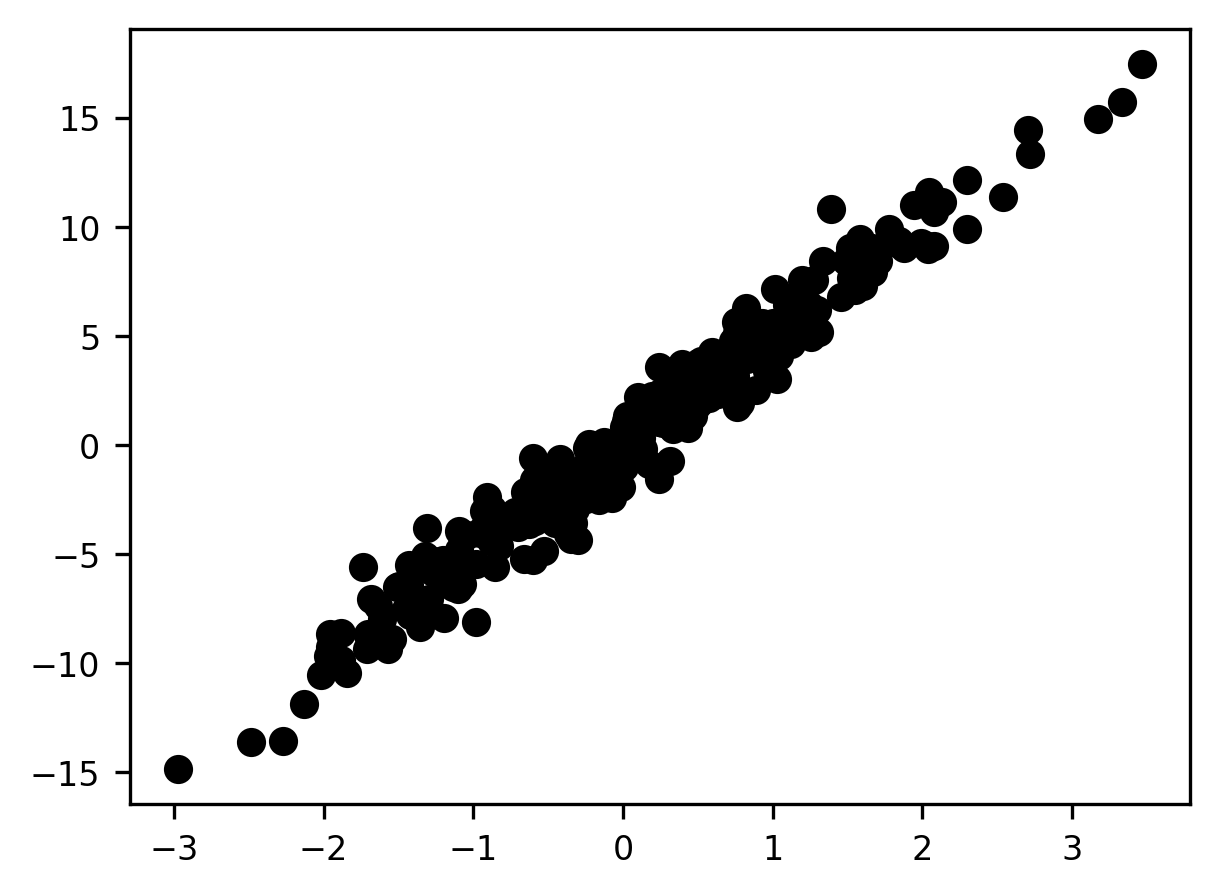

In [11]:
x = np.random.normal(size=300)
y = x * 5 + np.random.normal(size=300)

fig, ax = plt.subplots()
s = ax.scatter(x, y)

Nominally, this is a two-dimensional dataset, and we're plotting the two features on the x and y axes, respectively. But it seems clear at a glance that there aren't *really* two dimensions in the data—or at the very least, one dimension is far more important than the other. In this case, we could capture the vast majority of the variance along both dimensions with a single axis placed along the diagonal of the plot—in essence, "rotating" the axes to a "simpler" structure.  If we keep only the first dimension in the new space and lose the second dimension, we reduce our 2-dimensional dataset to 1 dimension, with very little loss of information. In the next section, we will dive into the nuts and bolts of machine learning in Python, by introducing the Scikit Learn machine learning library.

(ml-core-addtl-resources)=
### Additional resources

If you are interested in diving deeper into the distinction between prediction and explanation, we really recommend Leo Breiman's classical paper ["The two cultures of statistical modeling"](https://projecteuclid.org/download/pdf_1/euclid.ss/1009213726) {cite}`breiman2001statistical` . Another great paper on this topic is Galit Shmueli's ["To explain or to predict?"](https://projecteuclid.org/download/pdfview_1/euclid.ss/1294167961) {cite}`shmueli2010explain`. Finally you can read one of us weighing in on the topic, together with Jake Westfall, in a paper titled ["Choosing Prediction Over Explanation in Psychology: Lessons From Machine Learning"](https://talyarkoni.org/pdf/Yarkoni_PPS_2017.pdf) {cite}`yarkoni2017choosing`.